In [1]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()
X = dataset.data
y = dataset.target

In [2]:
import numpy as np
np.random.seed(21)
idx_rand = np.random.randint(len(X), size=8)

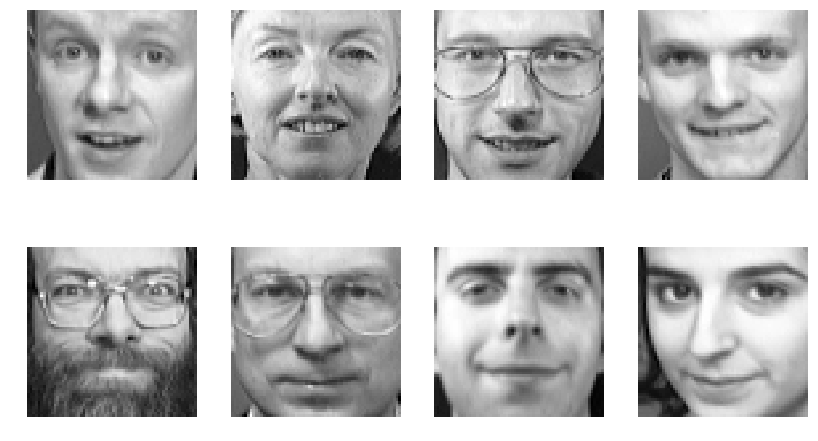

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 8))
for p, i in enumerate(idx_rand):
    plt.subplot(2, 4, p + 1)
    plt.imshow(X[i, :].reshape((64, 64)), cmap='gray')
    plt.axis('off')

In [4]:
n_samples, n_features = X.shape
X -= X.mean(axis=0)

In [5]:
X -= X.mean(axis=1).reshape(n_samples, -1)

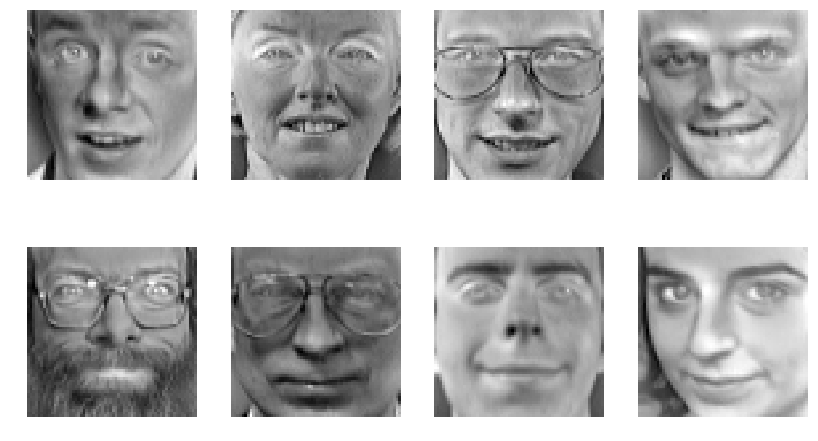

In [6]:
plt.figure(figsize=(14, 8))
for p, i in enumerate(idx_rand):
    plt.subplot(2, 4, p + 1)
    plt.imshow(X[i, :].reshape((64, 64)), cmap='gray')
    plt.axis('off')
plt.savefig('olivetti-pre.png')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=21
)

In [8]:
import cv2
rtree = cv2.ml.RTrees_create()

In [9]:
num_trees = 50
eps = 0.01
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,
            num_trees, eps)
rtree.setTermCriteria(criteria)

In [10]:
rtree.setMaxCategories(len(np.unique(y)))

In [11]:
rtree.setMaxDepth(1000)

In [12]:
rtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train);

In [13]:
rtree.getMaxDepth()

25

In [14]:
_, y_hat = rtree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.84

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=21, max_depth=25)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.47

In [16]:
num_trees = 100
eps = 0.01
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,
            num_trees, eps)
rtree.setTermCriteria(criteria)
rtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train);
_, y_hat = rtree.predict(X_test)
accuracy_score(y_test, y_hat)

0.88